<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,84.175335,44.027762,0.015312,138.218409,138.184370,0.034039
1,0.0,1.0,58.961668,63.653149,0.171237,132.786054,132.607861,0.178193
2,0.0,2.0,38.936951,86.861292,0.246194,136.044436,135.795950,0.248487
3,0.0,3.0,64.642815,37.656720,-0.030281,112.269253,112.303189,-0.033936
4,0.0,4.0,59.524791,57.733988,-0.174968,127.083811,127.254929,-0.171118
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.367705,33.048609,0.033819,118.450132,118.393467,0.056665
249996,999.0,246.0,48.018126,43.152933,0.768812,101.939870,101.176304,0.763566
249997,999.0,247.0,58.875483,33.216735,0.324697,102.416915,102.089541,0.327373
249998,999.0,248.0,22.162379,73.384286,-0.259587,105.287079,105.567194,-0.280116


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,84.175335,44.027762,0.015312,138.218409,138.184370,0.034039
1,0.0,1.0,58.961668,63.653149,0.171237,132.786054,132.607861,0.178193
2,0.0,2.0,38.936951,86.861292,0.246194,136.044436,135.795950,0.248487
3,0.0,3.0,64.642815,37.656720,-0.030281,112.269253,112.303189,-0.033936
4,0.0,4.0,59.524791,57.733988,-0.174968,127.083811,127.254929,-0.171118
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.367705,33.048609,0.033819,118.450132,118.393467,0.056665
249996,999.0,246.0,48.018126,43.152933,0.768812,101.939870,101.176304,0.763566
249997,999.0,247.0,58.875483,33.216735,0.324697,102.416915,102.089541,0.327373
249998,999.0,248.0,22.162379,73.384286,-0.259587,105.287079,105.567194,-0.280116


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    84.175335  44.027762  0.015312  138.218409  138.184370  0.034039
      1.0    58.961668  63.653149  0.171237  132.786054  132.607861  0.178193
      2.0    38.936951  86.861292  0.246194  136.044436  135.795950  0.248487
      3.0    64.642815  37.656720 -0.030281  112.269253  112.303189 -0.033936
      4.0    59.524791  57.733988 -0.174968  127.083811  127.254929 -0.171118
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.367705  33.048609  0.033819  118.450132  118.393467  0.056665
      246.0  48.018126  43.152933  0.768812  101.939870  101.176304  0.763566
      247.0  58.875483  33.216735  0.324697  102.416915  102.089541  0.327373
      248.0  22.162379  73.384286 -0.259587  105.287079  105.567194 -0.280116
      249.0  26.535518  87.090315  0.807879  124.433712  123.633516  0.800196

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    84.175335  44.027762  0.015312  138.218409  138.184370  0.034039
      1.0    58.961668  63.653149  0.171237  132.786054  132.607861  0.178193
      2.0    38.936951  86.861292  0.246194  136.044436  135.795950  0.248487
      3.0    64.642815  37.656720 -0.030281  112.269253  112.303189 -0.033936
      4.0    59.524791  57.733988 -0.174968  127.083811  127.254929 -0.171118
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.367705  33.048609  0.033819  118.450132  118.393467  0.056665
      246.0  48.018126  43.152933  0.768812  101.939870  101.176304  0.763566
      247.0  58.875483  33.216735  0.324697  102.416915  102.089541  0.327373
      248.0  22.162379  73.384286 -0.259587  105.287079  105.567194 -0.280116
      249.0  26.535518  87.090315  0.807879  124.433712  123.633516  0.800196

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,84.175335,44.027762,0.015312,138.218409,138.184370,0.034039
1,0.0,1.0,58.961668,63.653149,0.171237,132.786054,132.607861,0.178193
2,0.0,2.0,38.936951,86.861292,0.246194,136.044436,135.795950,0.248487
3,0.0,3.0,64.642815,37.656720,-0.030281,112.269253,112.303189,-0.033936
4,0.0,4.0,59.524791,57.733988,-0.174968,127.083811,127.254929,-0.171118
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.367705,33.048609,0.033819,118.450132,118.393467,0.056665
249996,999.0,246.0,48.018126,43.152933,0.768812,101.939870,101.176304,0.763566
249997,999.0,247.0,58.875483,33.216735,0.324697,102.416915,102.089541,0.327373
249998,999.0,248.0,22.162379,73.384286,-0.259587,105.287079,105.567194,-0.280116


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    84.175335  44.027762  0.015312  138.218409  138.184370  0.034039
      1.0    58.961668  63.653149  0.171237  132.786054  132.607861  0.178193
      2.0    38.936951  86.861292  0.246194  136.044436  135.795950  0.248487
      3.0    64.642815  37.656720 -0.030281  112.269253  112.303189 -0.033936
      4.0    59.524791  57.733988 -0.174968  127.083811  127.254929 -0.171118
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.367705  33.048609  0.033819  118.450132  118.393467  0.056665
      246.0  48.018126  43.152933  0.768812  101.939870  101.176304  0.763566
      247.0  58.875483  33.216735  0.324697  102.416915  102.089541  0.327373
      248.0  22.162379  73.384286 -0.259587  105.287079  105.567194 -0.280116
      249.0  26.535518  87.090315  0.807879  124.433712  123.633516  0.800196

[250000 rows x 6 columns]

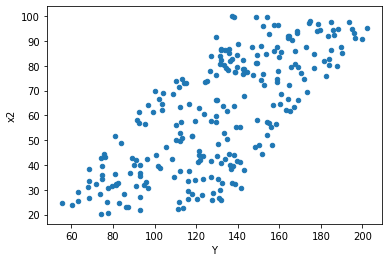

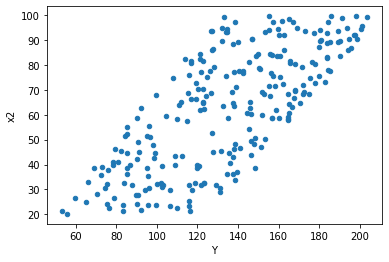

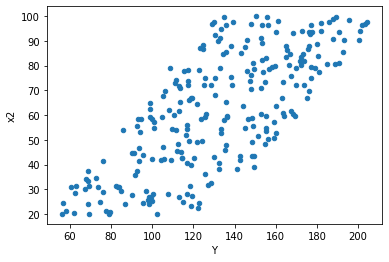

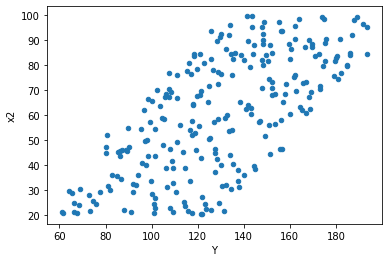

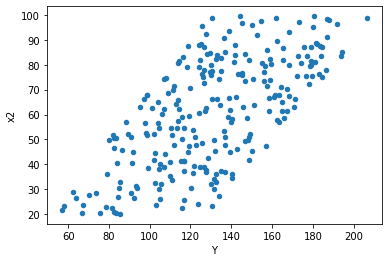

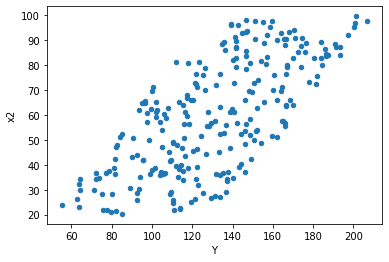

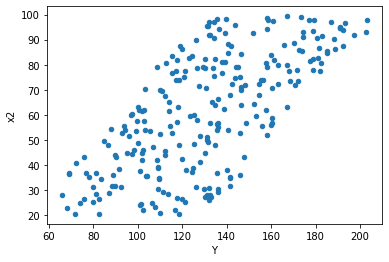

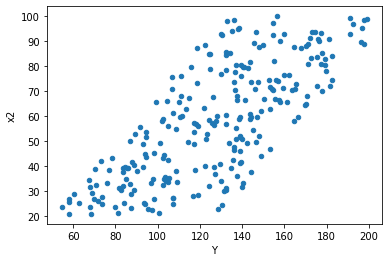

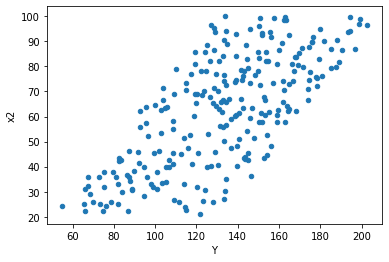

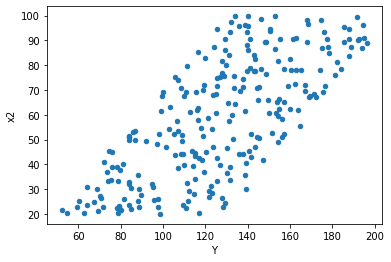

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,98.0,98.0,44.141169453076216,71.23667304826853,0.4504200964599614,0.7269048270231483,1.613837465815125,0.018678716267549023,0.9906606418662255,0.009339358133774511,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,39.95550252122559,48.18885781442628,0.4077092094002611,0.4917230389227171,1.2060631145566716,0.3553012133727149,0.8223493933136425,0.17765060668635746,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,39.19248098885542,53.30148623238698,0.3999232753964839,0.54389271665701,1.3599926538854104,0.12974689723492228,0.9351265513825389,0.06487344861746114,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,27.780667202636966,61.80652223136681,0.2834761959452752,0.6306787982792532,2.2248033778504817,9.722390477806542e-05,0.999951388047611,4.861195238903271e-05,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,48.55107152886358,50.877110154390486,0.49541909723330185,0.5191541852488825,1.0479091099800768,0.8172899686809045,0.5913550156595477,0.40864498434045227,Reject001=1 : Homoscedasticity
11.0,98.0,98.0,40.23039421749482,45.66059253163481,0.4105142267091308,0.4659244135881103,1.1349775069263077,0.5320387665872943,0.7339806167063528,0.26601938329364716,Reject001=1 : Homoscedasticity
14.0,98.0,98.0,39.85529683325761,53.815845784035886,0.40668670238017973,0.5491412835105702,1.3502808926297787,0.1388946183794202,0.9305526908102899,0.0694473091897101,Reject001=1 : Homoscedasticity
16.0,98.0,98.0,48.324851965308305,52.64231366451018,0.4931107343398807,0.5371664659643897,1.0893424712878856,0.6727128969767171,0.6636435515116414,0.33635644848835855,Reject001=1 : Homoscedasticity
19.0,98.0,98.0,37.4390948474776,46.55341701296229,0.382031580076302,0.4750348674792071,1.2434439775484787,0.28252279420617854,0.8587386028969107,0.14126139710308927,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,52.82164519251374,48.95659015942392,0.5389963795154463,0.49955704244310123,0.9268281966795384,0.7075760327289049,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,53.03358566524051,42.743241807174236,0.5411590374004134,0.4361555286446351,0.8059655267697501,0.2873359733151871,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,44.141169453076216,71.23667304826853,0.4504200964599614,0.7269048270231483,1.613837465815125,0.018678716267549023,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,63.61310081824275,59.73083262096514,0.6491132736555383,0.6094982920506646,0.9389706185150423,0.7558984783699524,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,39.95550252122559,48.18885781442628,0.4077092094002611,0.4917230389227171,1.2060631145566716,0.3553012133727149,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,39.19248098885542,53.30148623238698,0.3999232753964839,0.54389271665701,1.3599926538854104,0.12974689723492228,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,50.76151279147637,48.28949669433717,0.5179746203211875,0.4927499662687466,0.9513013706409024,0.8053179033885037,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,27.780667202636966,61.80652223136681,0.2834761959452752,0.6306787982792532,2.2248033778504817,9.722390477806542e-05,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,48.55107152886358,50.877110154390486,0.49541909723330185,0.5191541852488825,1.0479091099800768,0.8172899686809045,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      937
Reject001=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64